In [32]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
import os
from mpdaf.obj import Cube
from mpdaf.obj import WCS
from mpdaf.drs import PixTable
import astropy.io.fits as fits
import pandas as pd
from matplotlib import rc
import numpy.ma as ma
from PyAstronomy import pyasl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)



path_s = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects_sean.fits')
data_s =  fits.getdata(path_s, 1, ignore_missing_end=True)
path_w = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects.fits')
data_w = fits.getdata(path_w, 1, ignore_missing_end=True)


ra_w, dec_w = data_w['ra'], data_w['dec']

ID_s = data_s['row']
ID_w = data_w['row']

name_s = data_s['name']
name_w = data_w['name']

ql_s = data_s['quality']
ql_w = data_w['quality']

cl_s = data_s['class']
cl_w = data_w['class']

cl_s_num = np.zeros_like(cl_s)
cl_w_num = np.zeros_like(cl_w)
classes = ['galaxy', 'star', 'quasar', 'hizgal']
for i in range(4):
    cl_s_num = np.where(cl_s != classes[i], cl_s_num, i)
    cl_w_num = np.where(cl_w != classes[i], cl_w_num, i)
    
cl_s_num = cl_s_num.astype(float)
cl_w_num = cl_w_num.astype(float)


z_s = data_s['redshift']
z_w = data_w['redshift']

ct_s = data_s['comment']
ct_w = data_w['comment']

ql_mask = ma.masked_where(np.abs(ql_s - ql_w) == 0, ID_s)
ID_ql_diff = ID_s[~ql_mask.mask]
name_ql_diff = name_s[~ql_mask.mask]
ql_s_diff = ql_s[~ql_mask.mask]
ql_w_diff = ql_w[~ql_mask.mask]

cl_mask = ma.masked_where(np.abs(cl_s_num - cl_w_num) == 0, ID_s)
ID_cl_diff = ID_s[~cl_mask.mask]
name_cl_diff = name_s[~cl_mask.mask]
cl_s_diff = cl_s[~cl_mask.mask]
cl_w_diff = cl_w[~cl_mask.mask]

z_mask = ma.masked_where(np.abs(z_s - z_w) <= 0.02, ID_s)
ID_z_diff = ID_s[~z_mask.mask]
name_z_diff = name_s[~z_mask.mask]
z_s_diff = z_s[~z_mask.mask]
z_w_diff = z_w[~z_mask.mask]

# Table 1
columns_1 = [r"ID", r"Name", r"Sean's qua", r"Will's qua"]
ql_compare_1 = np.stack([ID_ql_diff, name_ql_diff, ql_s_diff, ql_w_diff], axis=1)
Table_1 = pd.DataFrame(ql_compare_1, index=1 + np.arange(len(ID_ql_diff)), columns=columns_1)
Table_1

columns_2 = [r"ID", r"Name", r"Sean's class", r"Will's class"]
ql_compare_2 = np.stack([ID_cl_diff, name_cl_diff, cl_s_diff, cl_w_diff], axis=1)
Table_2 = pd.DataFrame(ql_compare_2, index=1 + np.arange(len(ID_cl_diff)), columns=columns_2)
Table_2

columns_3 = [r"ID", r"Name", r"Sean's z", r"Will's z"]
ql_compare_3 = np.stack([ID_z_diff, name_z_diff, z_s_diff, z_w_diff], axis=1)
Table_3 = pd.DataFrame(ql_compare_3, index=1 + np.arange(len(ID_z_diff)), columns=columns_3)
Table_3

,ID,Name,Sean's qua,Will's qua


,ID,Name,Sean's class,Will's class
1,127,J024031.04-185201.55,hizgal,galaxy
2,163,J024031.67-185216.05,hizgal,galaxy


,ID,Name,Sean's z,Will's z
1,22,J024032.65-185119.30,0.8504999999999986,1.2916512384987184
2,30,J024033.12-185125.26,0.23049999999999882,0.05460000000000027
3,31,J024031.65-185126.40,0.9873999999999986,1.2811999999999997
4,42,J024031.77-185127.15,0.2797999999999988,0.3792999999999988
5,44,J024032.99-185129.09,1.4860999999999984,1.2685550080216683
6,47,J024032.83-185131.86,0.5947999999999987,0.5036999999999987
7,86,J024034.09-185141.83,0.7634999999999986,0.46839999999999876
8,111,J024031.37-185155.03,4.85752118045645,4.792500000000766
9,114,J024031.83-185158.50,0.5405393824172615,0.4168999999999999
10,127,J024031.04-185201.55,4.150000000000551,0.7175999999999987


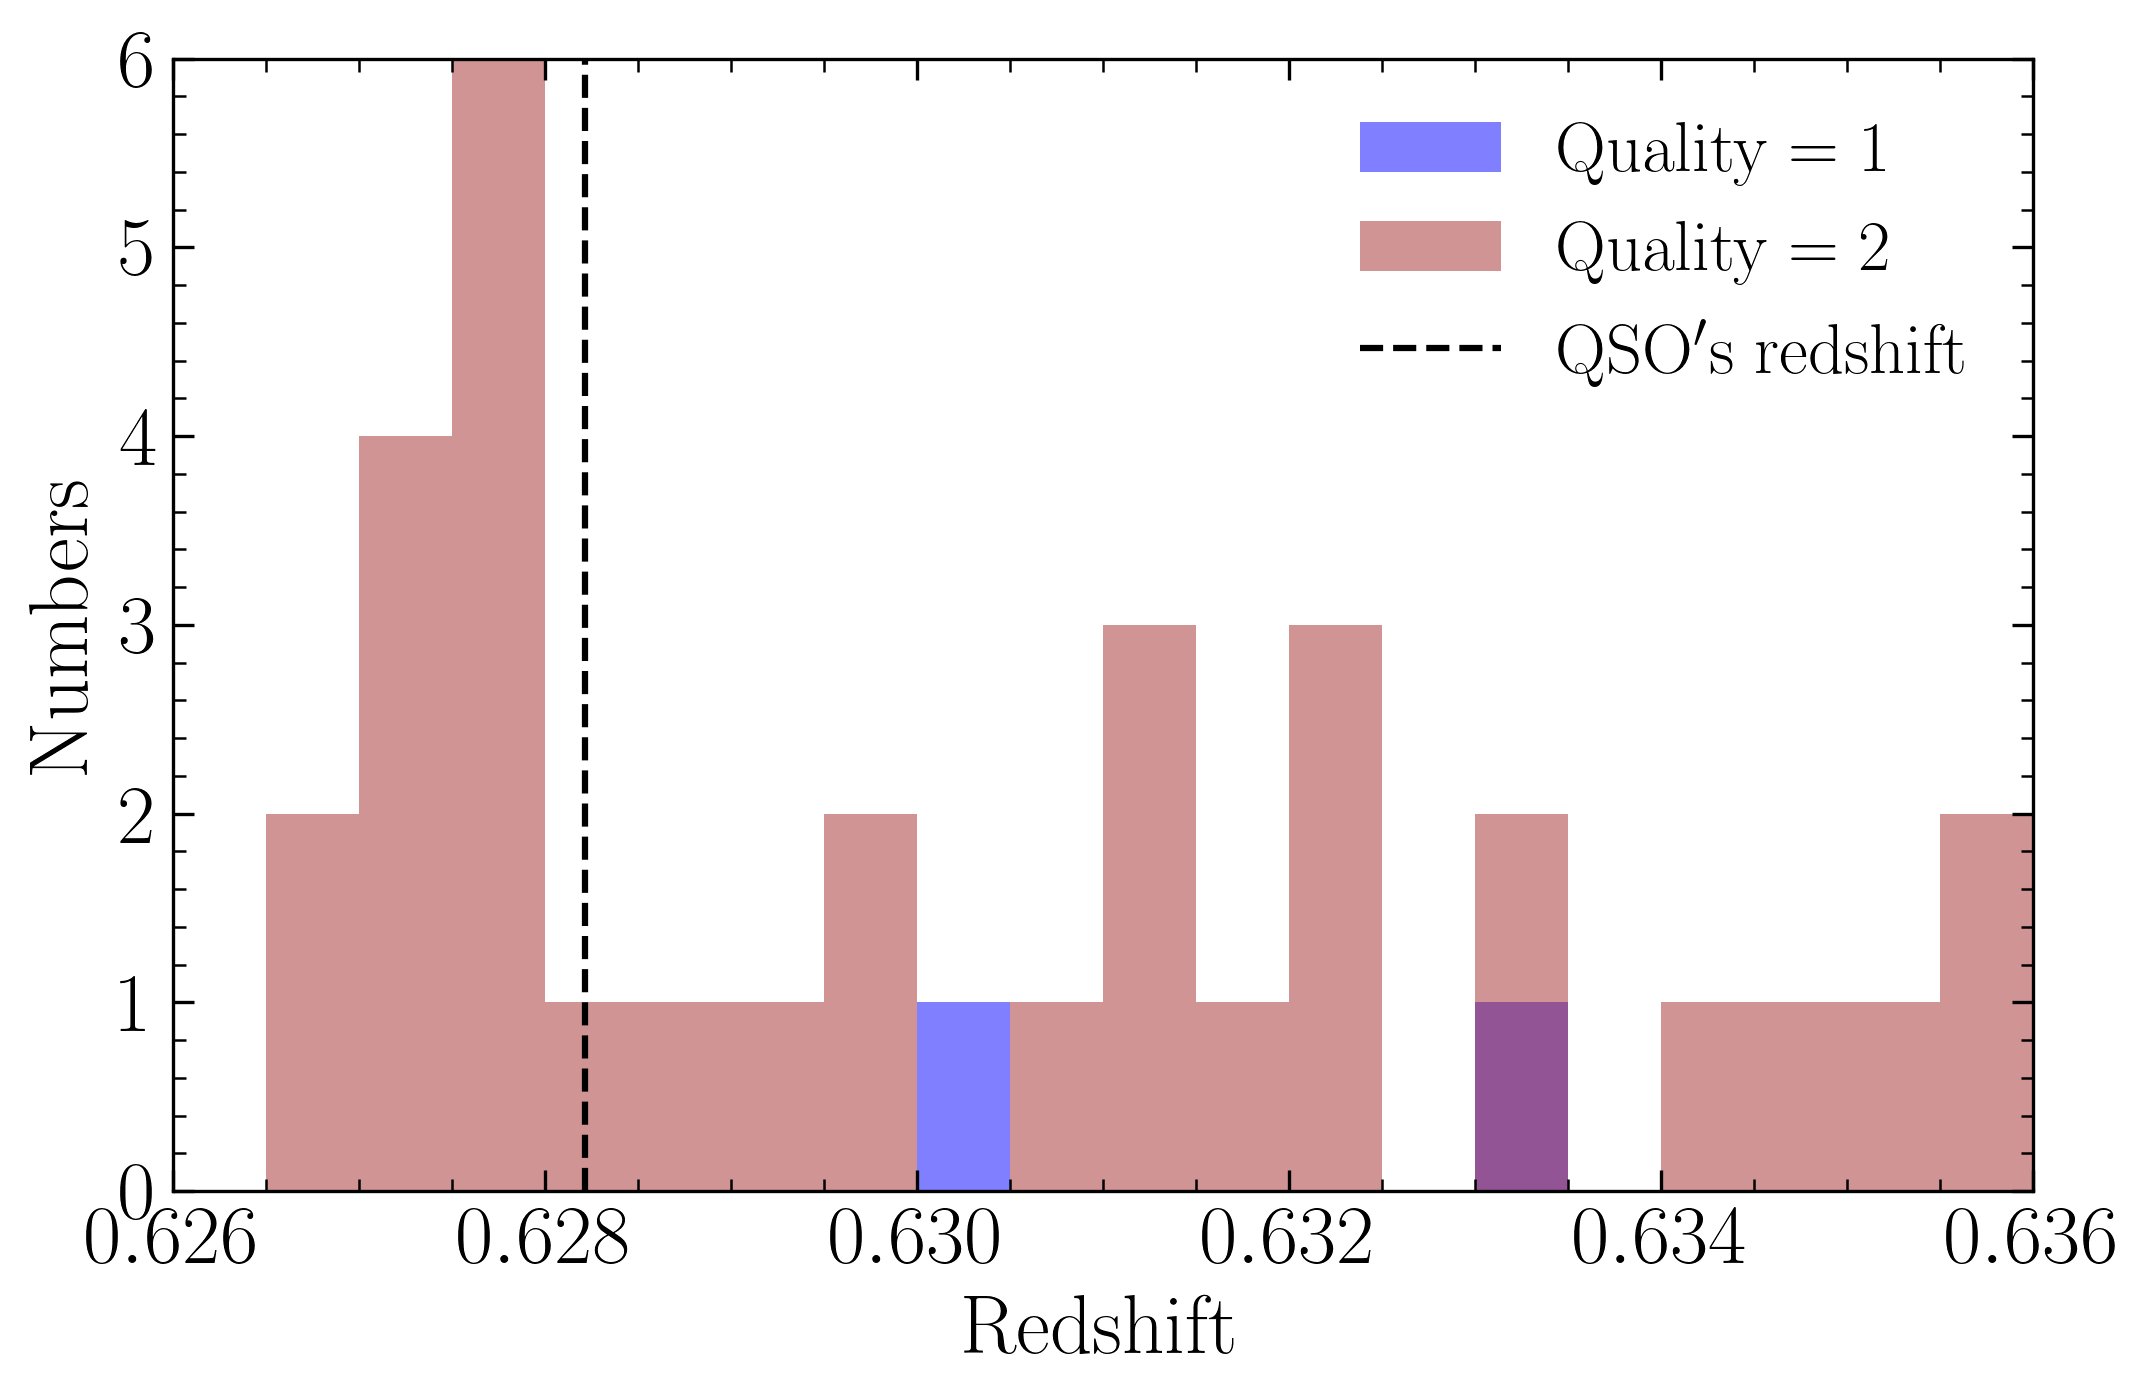

In [25]:
select_gal = np.where(cl_w == 'galaxy')
ID_gal = ID_w[select_gal]
z_gal = z_w[select_gal]
ql_gal = ql_w[select_gal]
ra_gal, dec_gal = ra_w[select_gal], dec_w[select_gal]

select_qua = np.where((ql_gal == 1) | (ql_gal == 2))
ID_qua = ID_gal[select_qua]
z_qua = z_gal[select_qua]
ql_qua = ql_gal[select_qua]
ra_qua, dec_qua = ra_gal[select_qua], dec_gal[select_qua]

# bins = np.linspace(0.6282144177077355 - 0.025, 0.6282144177077355 + 0.025, 50)
bins = np.linspace(0.626, 0.636, 21)
select_z = np.where((z_qua > bins[0]) * (z_qua < bins[-1]))
ID_final = ID_qua[select_z]
z_final = z_qua[select_z]
ql_final = ql_qua[select_z]
ra_final, dec_final = ra_qua[select_z], dec_qua[select_z]

# print((0.636 - 0.626) / 0.0005)
# qso redshift: z = 0.6282144177077355
plt.figure(figsize=(8, 5), dpi=300)
plt.vlines(0.6282144177077355, 0, 6, linestyles='--', color='k', label=r"$\mathrm{QSO's \; redshift}$")
plt.hist(z_final[np.where(ql_final == 1)], bins=bins, facecolor='blue', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 1$')
plt.hist(z_final[np.where(ql_final == 2)], bins=bins, facecolor='brown', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 2$')

plt.xlim(bins[0], bins[-1])
plt.ylim(0, 6)
plt.minorticks_on()
plt.xlabel(r'$\mathrm{Redshift}$', size=20)
plt.ylabel(r'$\mathrm{Numbers}$', size=20)
plt.tick_params(axis='both', which='major', direction='in', bottom='on', top='on', left='on', right='on', size=5, labelsize=20)
plt.tick_params(axis='both', which='minor', direction='in', bottom='on', top='on', left='on', right='on', size=3)
plt.legend(prop={'size': 17}, framealpha=0, loc=1, fontsize=15)

In [3]:
# Velocity dipersion

In [4]:
path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'ESO_DEEP_offset.fits')

cube = Cube(path)
hdul = fits.open(path)  # open a FITS file
hdr = hdul[1].header 
wcs = WCS(hdr)

# Calculate the white image
image_white = cube.sum(axis=0)
p, q = image_white.peak()['p'], image_white.peak()['q']
p_q = wcs.sky2pix(np.vstack((dec_final, ra_final)).T, nearest=True)
p_gal, q_gal = p_q.T[0], p_q.T[1]

In [5]:
# hdul = fits.open(path)  # open a FITS file
# hdr = hdul[2].header 
# wcs = WCS(hdr)
# print(wcs)

/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  if __name__ == '__main__':
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


[  1   4   5   6   7  11  13  20  27  35  36  57  62  64  68  72  80  81
  82  83  88  92  93 120 129 134 140 141 149 162 164 179 181 182]


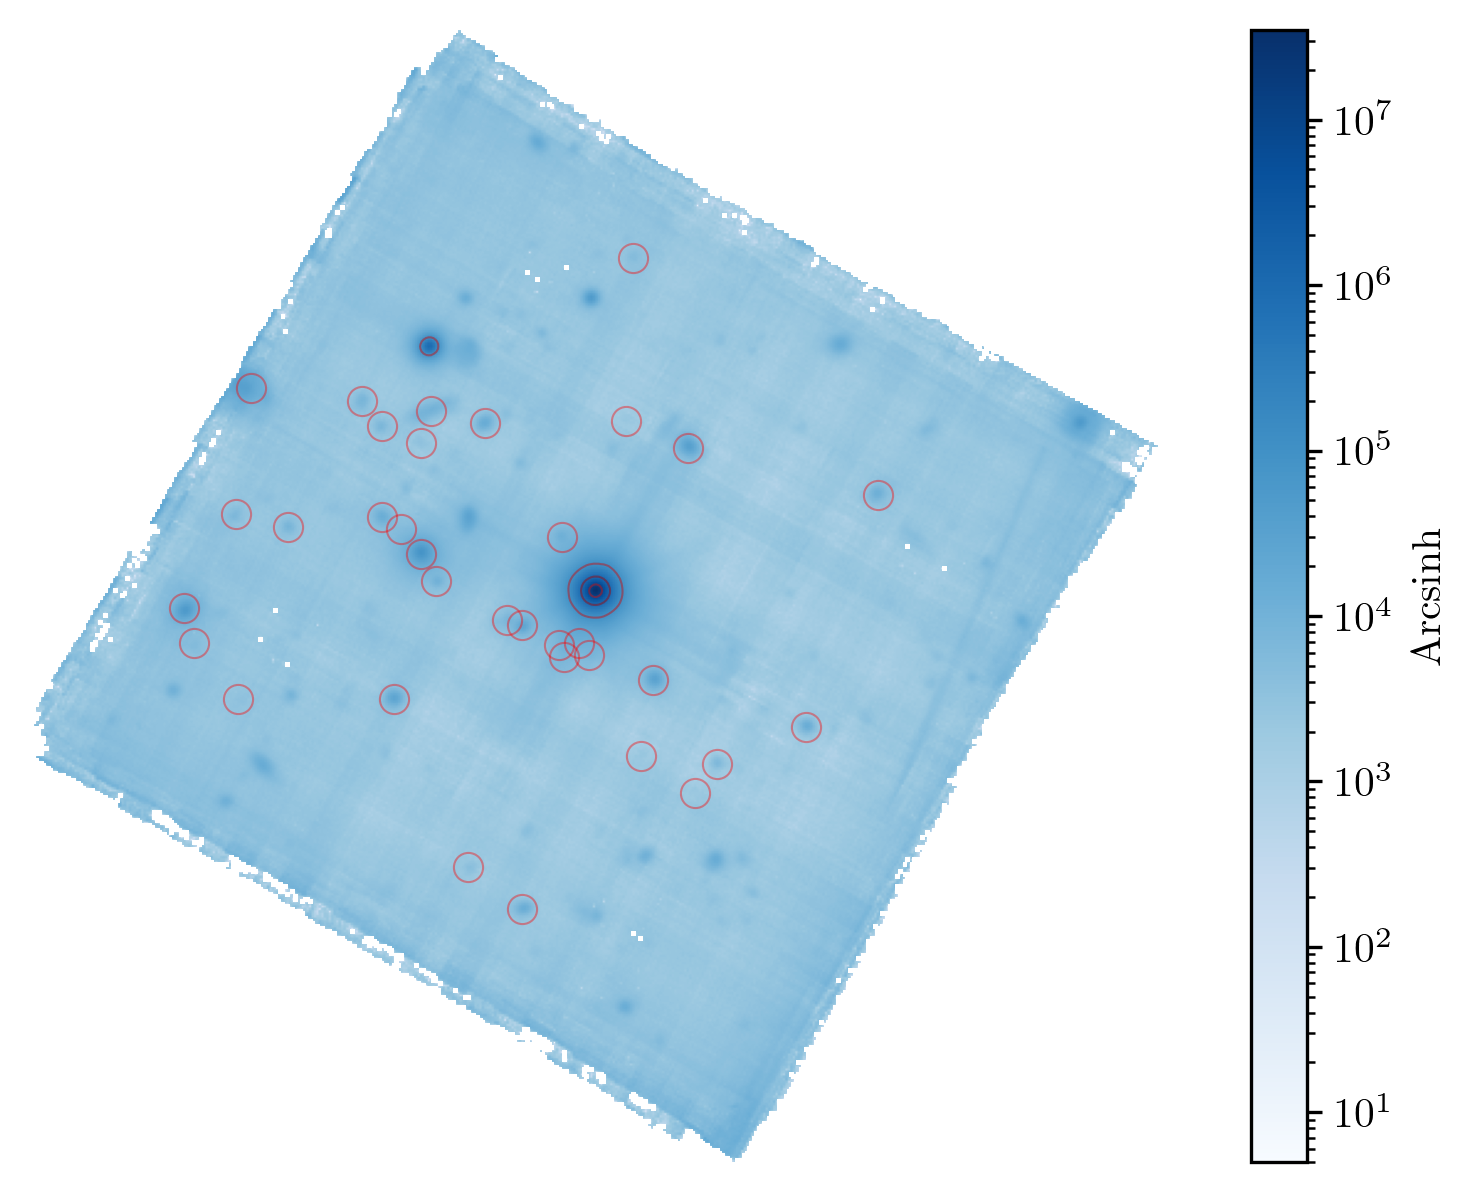

In [8]:
import matplotlib
Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)

plt.figure(figsize=(8, 5), dpi=300)
plt.imshow(image_white.data, origin='lower', vmin=5, cmap=newcmp, norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{Arcsinh}$')
plt.contour(image_white.data, levels=[1e5, 1e6, 1e7, 1e8], colors=newcolors_red[200::30, :], linewidths=0.5, alpha=0.5, norm=matplotlib.colors.LogNorm())

plt.plot(q_gal, p_gal, 'o', color='brown', ms=7, alpha=0.4, markerfacecolor='None', markeredgecolor='red', markeredgewidth=0.5)
plt.axis('off')
#plt.xlim(200, 250)
#plt.ylim(200, 250)
print(ID_final)

[INFO] 36 spaxels used


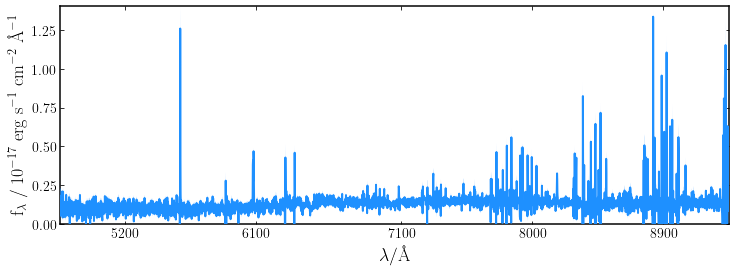

(<Figure size 864x288 with 1 Axes>,
 [<AxesSubplot:xlabel='$\\lambda / \\mathrm{\\AA}$', ylabel='$\\mathrm{f_{\\lambda}}\\ \\mathrm{/\\ 10^{-17}\\ erg\\ s^{-1}\\ cm^{-2}\\ \\AA^{-1}}$'>])

In [26]:
import bagpipes as pipes

eg_filt_list = ["list", "of", "filters"]

def load_data(ID):
    ID_sort = np.where(ID_final == float(ID))
    cube_ape = cube.aperture((p_gal[ID_sort][0], q_gal[ID_sort][0]), 0.6, unit_center=None, is_sum=True)
    wave_vac = pyasl.airtovac2(cube_ape.wave.coord())
    flux = cube_ape.data * 1e-20
    flux_err = np.sqrt(cube_ape.var) * 1e-20

    return np.array([wave_vac, flux, flux_err]).T


ID_number = '1'
galaxy = pipes.galaxy(ID_number, load_data, filt_list=eg_filt_list, photometry_exists=False)

galaxy.plot()
# burst = {}
# burst["age"] = (0., 15.)                  # Vary age from 0 to 15 Gyr
# burst["metallicity"] = (0., 2.5)          # Vary metallicity from 0 to 2.5 Solar
# burst["massformed"] = (0., 13.)           # Vary log_10(mass formed) from 0 to 13

# fit_instructions = {}
# fit_instructions["burst"] = burst         # Add the burst sfh component to the fit
# fit_instructions["redshift"] = (0., 1.)  # Vary observed redshift from 0 to 10

# # burst1 = {}                                   # A burst component
# # burst1["age"] = 0.1                           # Fix age to 0.1 Gyr
# # burst1["metallicity"] = (0., 2.5)             # Vary metallicity from 0 to 2.5 Solar
# # burst1["massformed"] = (0., 13.)              # Vary log_10(mass formed) from 0 to 13

# # burst2 = {}                                   # A second burst component
# # burst2["age"] = 1.0                           # Fix the age to 1.0 Gyr
# # burst2["metallicity"] = "burst1:metallicity"  # Mirror burst1:metallicity
# # burst2["massformed"] = (0., 13.)              # Vary log_10(mass formed) from 0 to 13

# # fit_instructions = {}
# # fit_instructions["burst1"] = burst1           # Add the burst1 sfh component to the fit
# # fit_instructions["burst2"] = burst2           # Add the burst2 sfh component to the fit
# # fit_instructions["redshift"] = (0., 10.)      # Vary observed redshift from 0 to 10

# # component = {}
# # component["parameter_prior"] = "uniform"   # Uniform prior
# # component["parameter_prior"] = "log_10"    # Uniform in log_10(parameter)
# # component["parameter_prior"] = "log_e"     # Uniform in log_e(parameter)
# # component["parameter_prior"] = "pow_10"    # Uniform in 10**parameter
# # component["parameter_prior"] = "recip"     # Uniform in 1/parameter
# # component["parameter_prior"] = "recipsq"   # Uniform in 1/parameter**2

# # component["parameter_prior"] = "Gaussian"  # Gaussian, also requires:
# # component["parameter_prior_mu"] = 0.5      # Gaussian mean
# # component["parameter_prior_sigma"] = 0.1   # Gaussian standard dev.

# # galaxy.plot()
# fit = pipes.fit(galaxy, fit_instructions)
# fit.fit()
# fit.plot_spectrum_posterior()  # Shows the input and fitted spectrum/photometry
# fit.plot_sfh_posterior()       # Shows the fitted star-formation history
# fit.plot_1d_posterior()        # Shows 1d posterior probability distributions
# fit.plot_corner() 

# plt.figure(figsize=(8, 5))
# plt.plot(wave_vac, flux, '-')
# plt.plot(wave_vac, flux_err, '-')

In [ ]:
f